In [5]:
import pandas as pd

uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# Tradução das colunas

filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
dados_dos_filmes = pd.concat([filmes, generos], axis = 1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [14]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [2 2 1 ... 1 2 1]


In [16]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.34174941 -0.27380692 -0.23519333 -0.26176096 -0.56624266
   0.91866805 -0.21327094  0.10660126 -0.16723244  0.2961725   0.43844299
  -0.07291404 -0.17638272  0.67712789 -0.31600324  0.07185114  1.43790933
  -0.12303544 -0.04095276]
 [ 0.03716548 -0.3196691  -0.29640067 -0.22008116 -0.18225925  0.24922629
  -0.27493097  0.13336625  0.1022553  -0.18144489 -0.08959668 -0.10828743
  -0.11252127  0.0228144  -0.21944512  0.1894813  -0.19443013 -0.48661403
   0.06057548  0.02886537]
 [-0.05917995  0.76792272  1.62627988  1.2568895   1.14456924 -0.13466991
  -0.30653031 -0.21096006 -0.57984161  0.9949545  -0.09492563 -0.23930399
   0.56934917  0.18044772 -0.15777854 -0.27960724  0.67758218 -0.25142281
 

In [18]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns = generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.341749,-0.273807,-0.235193,-0.261761,-0.566243,0.918668,-0.213271,0.106601,-0.167232,0.296172,0.438443,-0.072914,-0.176383,0.677128,-0.316003,0.071851,1.437909,-0.123035,-0.040953
1,0.037165,-0.319669,-0.296401,-0.220081,-0.182259,0.249226,-0.274931,0.133366,0.102255,-0.181445,-0.089597,-0.108287,-0.112521,0.022814,-0.219445,0.189481,-0.194430,-0.486614,0.060575,0.028865
2,-0.059180,0.767923,1.626280,1.256890,1.144569,-0.134670,-0.306530,-0.210960,-0.579842,0.994955,-0.094926,-0.239304,0.569349,0.180448,-0.157779,-0.279607,0.677582,-0.251423,-0.055318,-0.053719


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

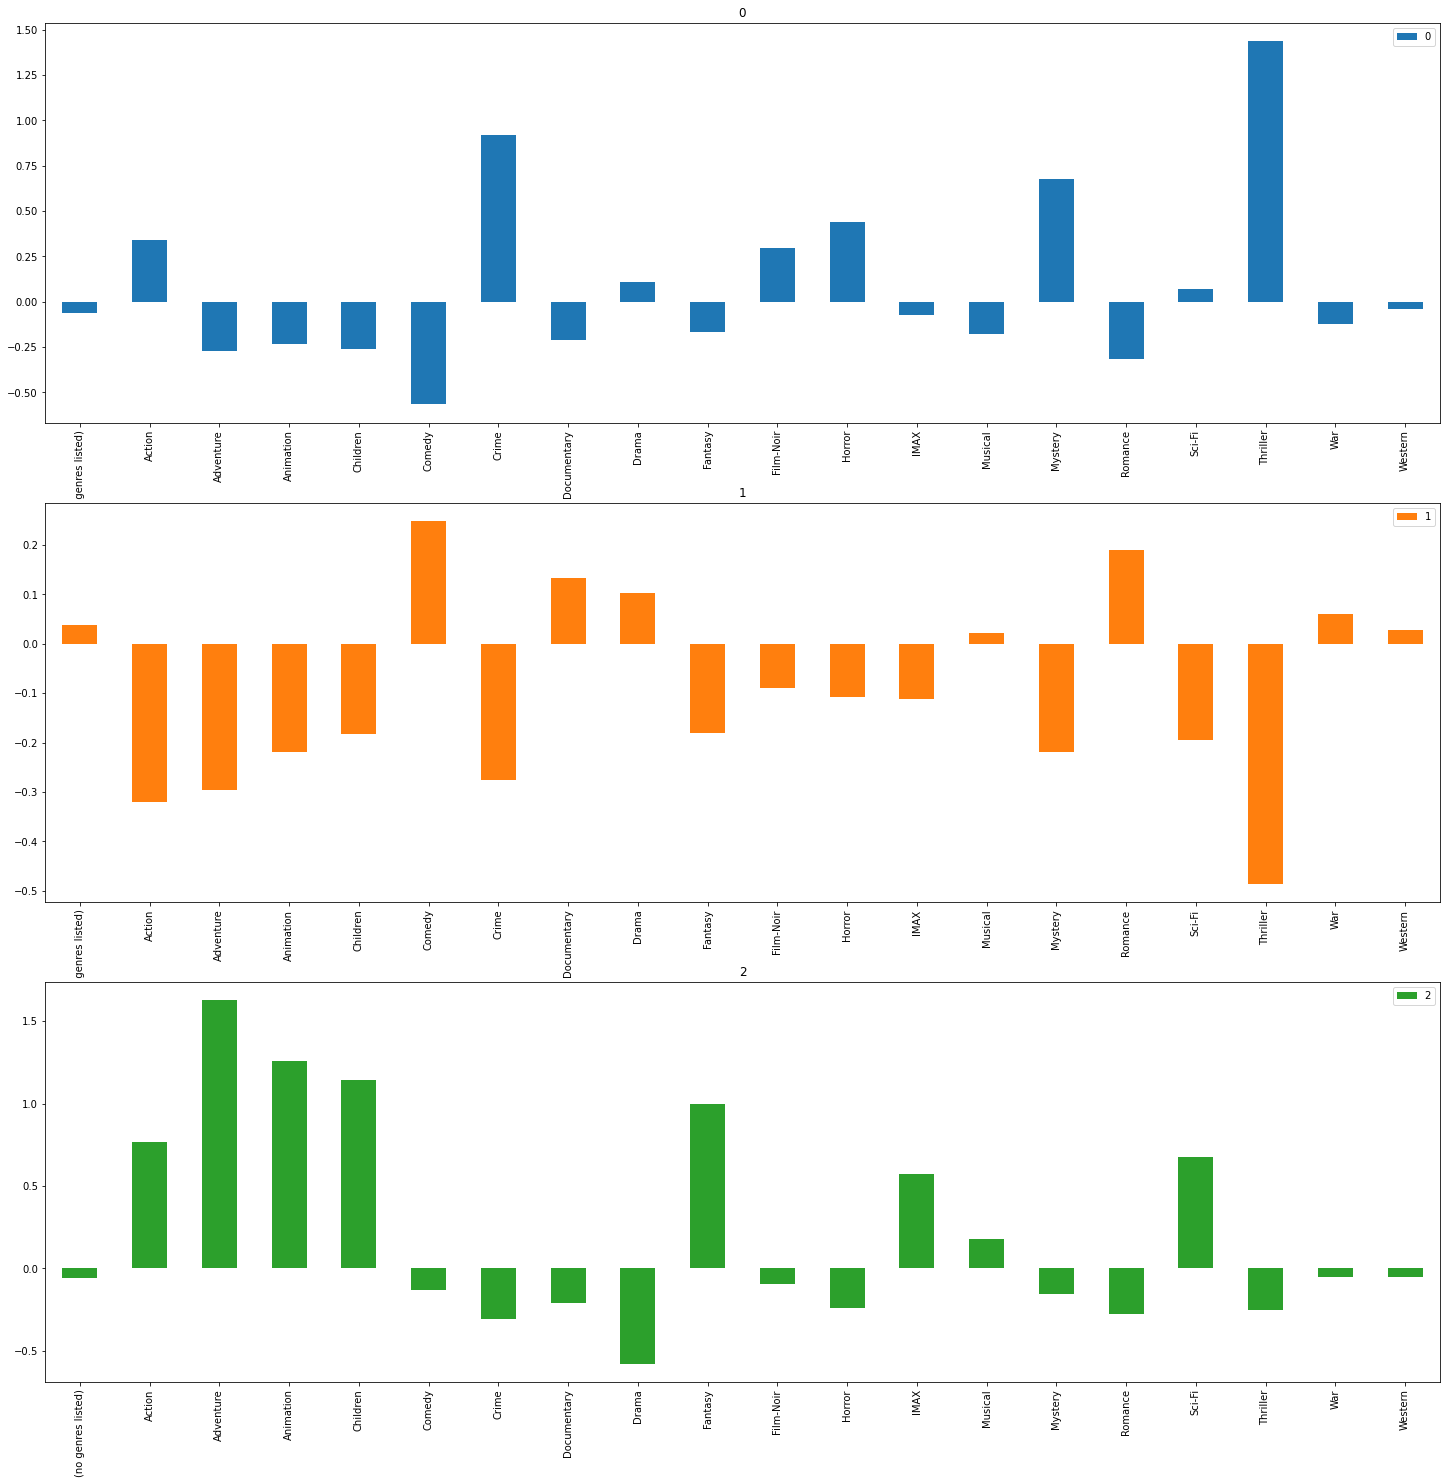

In [26]:
grupos.T.plot.bar(subplots=True,
                figsize=(25,25),
                sharex=False)

In [29]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2381,3159,Fantasia 2000 (1999),Animation|Children|Musical|IMAX,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
8908,135216,The Star Wars Holiday Special (1978),Adventure|Children|Comedy|Sci-Fi,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1543,2078,"Jungle Book, The (1967)",Animation|Children|Comedy|Musical,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6778,60161,Futurama: The Beast with a Billion Backs (2008),Action|Animation|Comedy|Romance|Sci-Fi,0,1,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
6235,46337,Garfield: A Tail of Two Kitties (2006),Animation|Children|Comedy,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7883,94777,Men in Black III (M.III.B.) (M.I.B.³) (2012),Action|Comedy|Sci-Fi|IMAX,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3598,4939,"Final Countdown, The (1980)",Action|Sci-Fi,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8361,109042,Knights of Badassdom (2013),Adventure|Comedy|Fantasy,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2784,3725,American Pop (1981),Animation|Musical,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7936,95717,Treasure Island (2012),Adventure,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
print(visualizacao)

[[-38.829163 -39.75257 ]
 [ 35.870636  27.9597  ]
 [ 26.422478 -24.399378]
 ...
 [ 13.132412   3.917503]
 [-46.260887  17.944956]
 [-18.82232  -20.162476]]


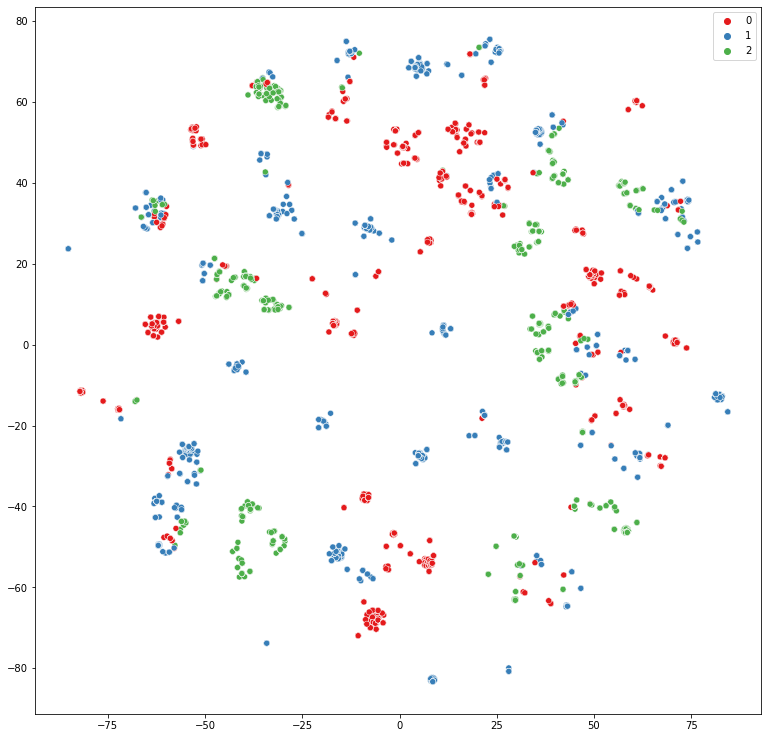

In [40]:
import seaborn as sns

ax = sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue = modelo.labels_,
                palette=sns.color_palette('Set1', 3))
ax.figure.set_size_inches(13,13)

In [44]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,2.080702,-0.143443,-0.165994,-0.270451,-0.180378,2.669289,-0.217489,-0.092436,-0.211960,-0.094926,-0.240584,-0.128397,-0.188419,-0.249986,-0.374329,-0.259726,0.850240,-0.202020,-0.132065
1,-0.05918,-0.346030,-0.282511,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.219824,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
2,-0.05918,-0.155045,-0.351198,-0.253330,-0.265305,-0.376419,-0.268035,-0.217489,-0.608109,-0.027025,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.365538,0.424478,0.606657,-0.202020,-0.132065
3,-0.05918,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
4,-0.05918,0.134321,0.875689,3.865793,1.576853,0.147220,-0.304729,-0.217489,-0.627348,0.721184,-0.094926,-0.257639,-0.128397,-0.188419,-0.179002,-0.279057,0.262458,-0.470158,-0.180508,-0.132065


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>,
       <AxesSubplot:title={'center':'17'}>,
       <AxesSubplot:title={'center':'18'}>,
       <AxesSubplot:title={'center':'19'}>], dtype=object)

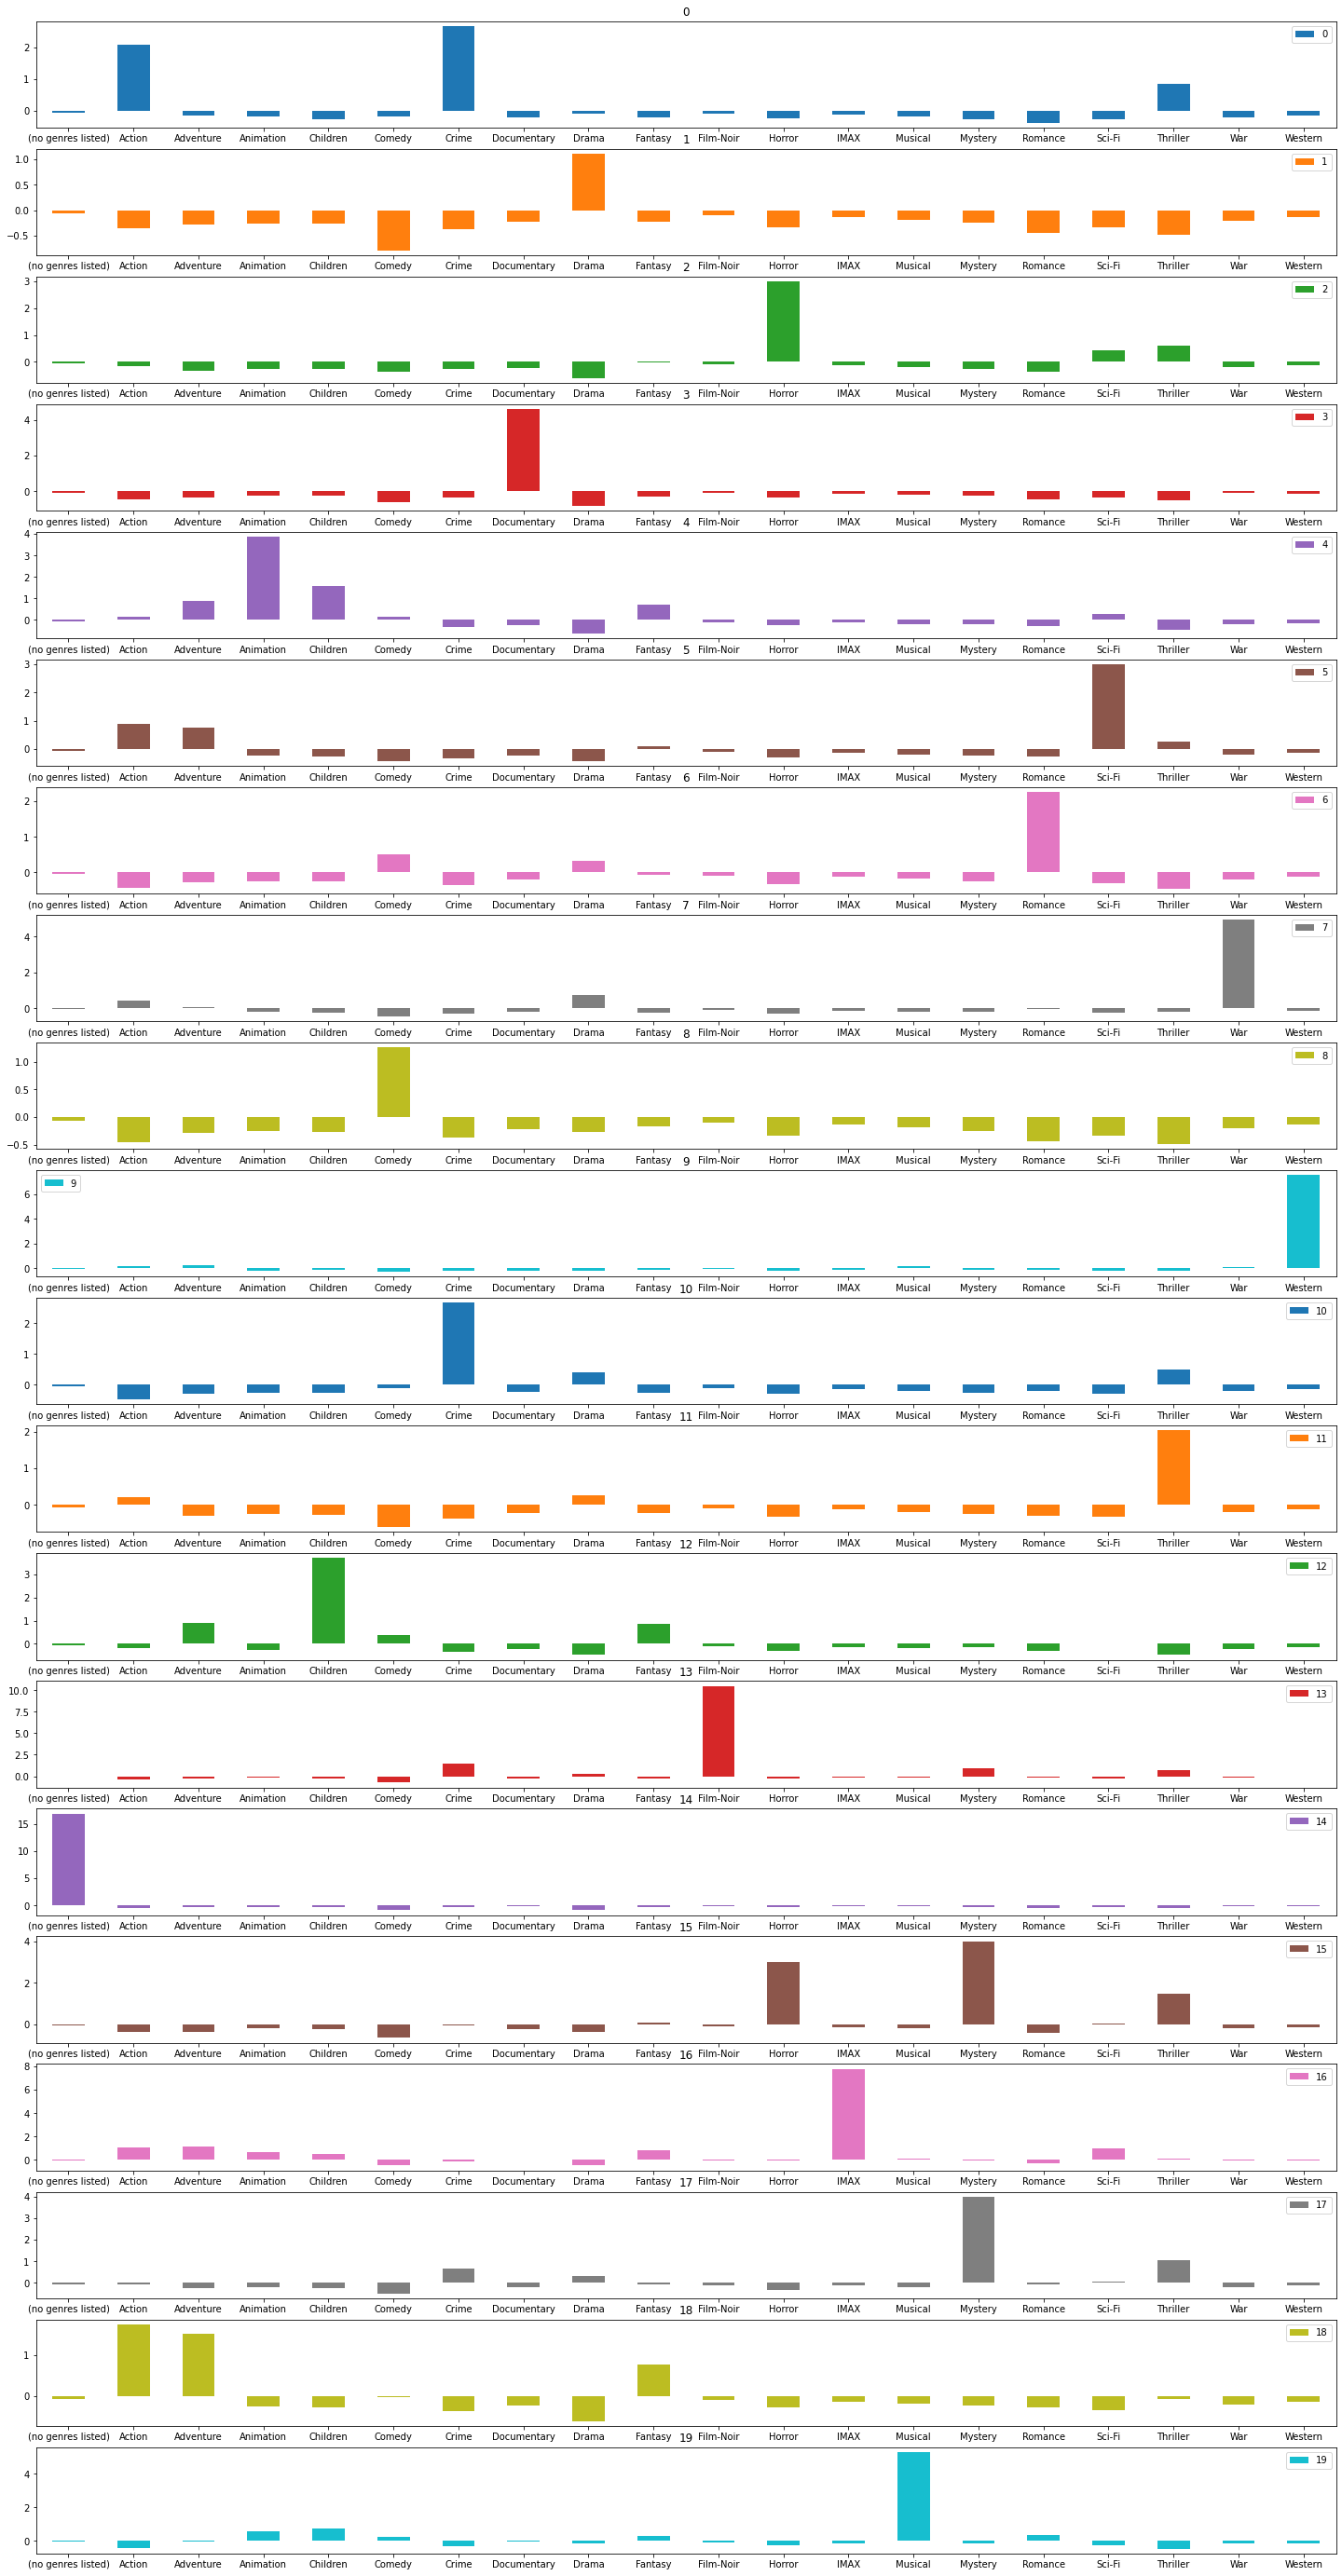

In [49]:
grupos.T.plot.bar(subplots=True,
                figsize=(25,50),
                sharex=False,
                rot=0)

In [50]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4053,5771,My Bloody Valentine (1981),Drama|Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5518,26523,"Silent Night, Deadly Night (1984)",Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2724,3658,Quatermass and the Pit (1967),Horror|Sci-Fi,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6516,53953,1408 (2007),Drama|Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5112,8137,"Wasp Woman, The (1959)",Horror|Sci-Fi,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9597,175705,Themroc (1973),Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2923,3919,Hellraiser III: Hell on Earth (1992),Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8146,102066,Resolution (2012),Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7160,71732,I Sell the Dead (2008),Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
8417,110773,"Haunted House 2, A (2014)",Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [53]:
def kmean(numero_de_clusters, generos):
    modelo = KMeans(n_clusters=numero_de_clusters)
    modelo.fit(generos)
    return [numero_de_clusters, modelo.inertia_]

In [57]:
resultado_erro = [kmean(i, generos_escalados) for i in range(1, 41)]
resultado_erro

[[1, 194839.9999999991],
 [2, 179665.07198465397],
 [3, 166185.30223985572],
 [4, 156259.22424815534],
 [5, 147817.45202322208],
 [6, 138981.05471459433],
 [7, 128356.0021174368],
 [8, 120640.2656627891],
 [9, 111151.05448692337],
 [10, 104889.07082359123],
 [11, 94554.08785491256],
 [12, 85146.81441655348],
 [13, 79952.22176471703],
 [14, 72718.60473664133],
 [15, 68170.32622234907],
 [16, 67006.7222945325],
 [17, 62095.433964891454],
 [18, 59506.32666849905],
 [19, 57417.76639926484],
 [20, 54787.9017312232],
 [21, 52453.23315812671],
 [22, 52377.89299609789],
 [23, 50883.84975456936],
 [24, 49419.06984277261],
 [25, 47480.109272504975],
 [26, 46562.77670211299],
 [27, 45867.18055234483],
 [28, 44409.716203573735],
 [29, 43536.38568832282],
 [30, 42893.62789109409],
 [31, 41645.76762566769],
 [32, 40578.41891031062],
 [33, 40037.393508742],
 [34, 39292.41234282655],
 [35, 37959.01551917924],
 [36, 37699.22943373928],
 [37, 37150.092049085506],
 [38, 36090.71691761523],
 [39, 35815.96

In [63]:
resultado_erros = pd.DataFrame(resultado_erro,
                                columns=['n_clusters', 'EQM'])
resultado_erros.head()

,n_clusters,EQM
0,1,194840.000000
1,2,179665.071985
2,3,166185.302240
3,4,156259.224248
4,5,147817.452023


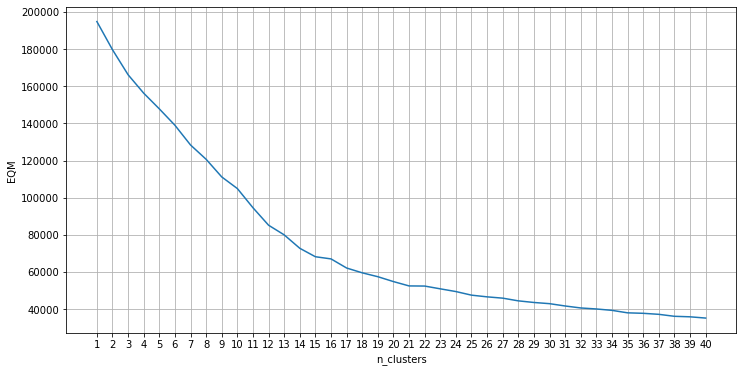

In [90]:
import numpy as np

ax = sns.lineplot(data = resultado_erros, y="EQM", x='n_clusters')
ax.figure.set_size_inches(12,6)
ax.set_xticks(np.arange(1,41))
ax.grid()

ax;


In [ ]:
modelo = 